In [1]:
%pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Importing the Necessary Libraries


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/93/vg7zf65913d920q1n72wl9580000gn/T/ipykernel_12727/3632437423.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Defining the columns based on the structure


In [3]:
column_names = ['UserID', 'Gender', 'Age', 'Occupation', 'ZipCode']

### Loading the data 

In [4]:
user_df = pd.read_csv('../../data/movies_grouplens/users.dat', sep='::', header=None, names=column_names, engine='python')
print(user_df.head())

   UserID Gender  Age  Occupation ZipCode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455


### Basic Statistics Information

In [5]:
# Basic statistics and info
print(user_df.info())
print(user_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   ZipCode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
None
            UserID          Age   Occupation
count  6040.000000  6040.000000  6040.000000
mean   3020.500000    30.639238     8.146854
std    1743.742145    12.895962     6.329511
min       1.000000     1.000000     0.000000
25%    1510.750000    25.000000     3.000000
50%    3020.500000    25.000000     7.000000
75%    4530.250000    35.000000    14.000000
max    6040.000000    56.000000    20.000000


### Gender Distribution

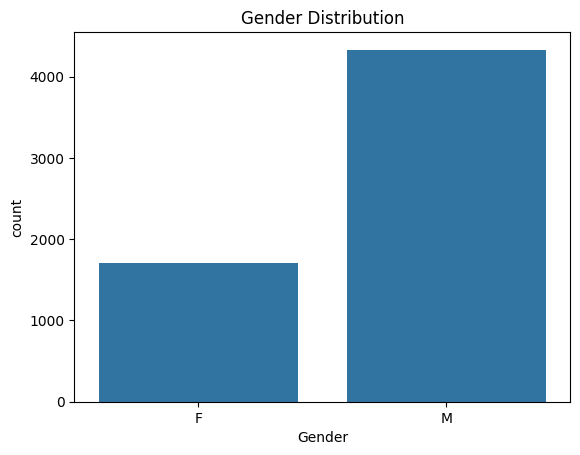

In [6]:
sns.countplot(data=user_df, x='Gender')
plt.title('Gender Distribution')
plt.show()

### Age distribution


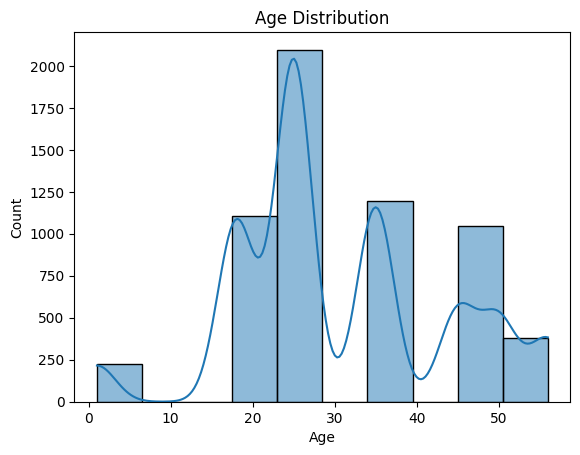

In [7]:
sns.histplot(data=user_df, x='Age', bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

### Occupation distribution

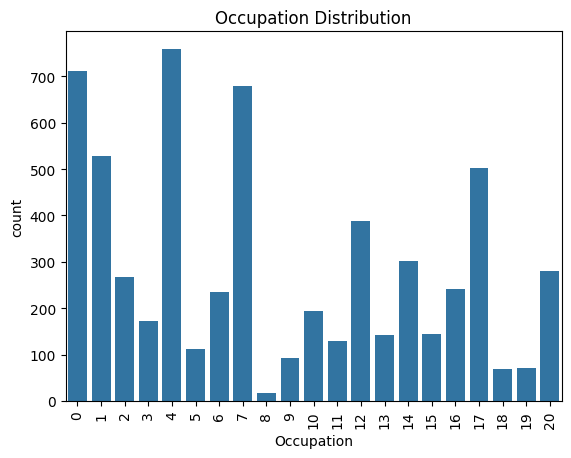

In [8]:
sns.countplot(data=user_df, x='Occupation')
plt.title('Occupation Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many occupations
plt.show()

### Age vs Gender Distribution

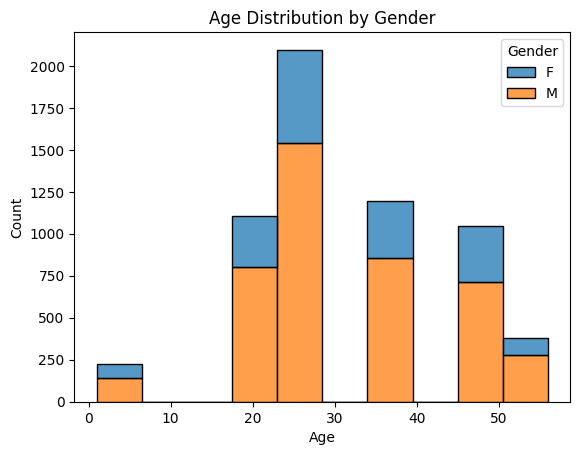

In [9]:
sns.histplot(data=user_df, x='Age', hue='Gender', multiple='stack', bins=10)
plt.title('Age Distribution by Gender')
plt.show()

### Occupation vs Gender

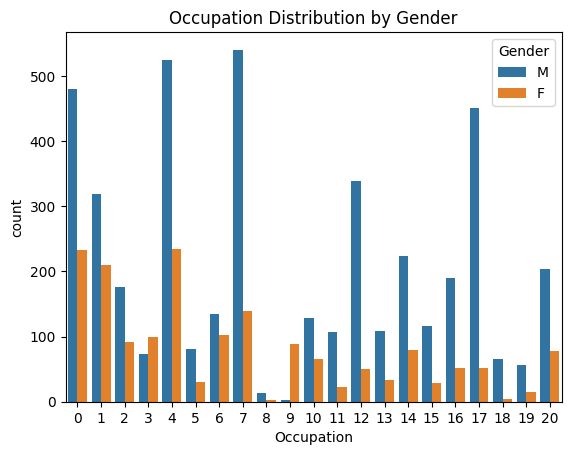

In [10]:
sns.countplot(data=user_df, x='Occupation', hue='Gender')
plt.title('Occupation Distribution by Gender')
plt.show()


### Occupation v/s age 

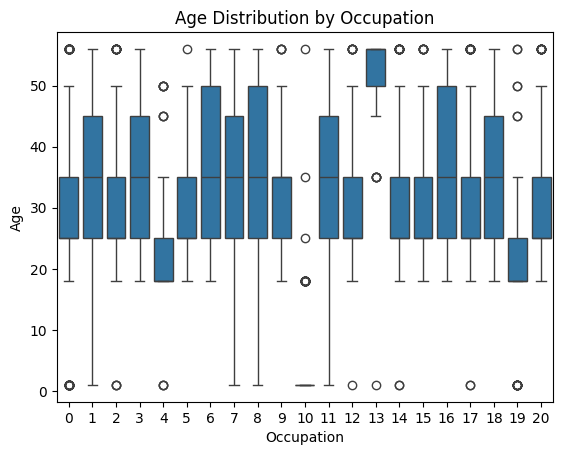

In [11]:
sns.boxplot(data=user_df, x='Occupation', y='Age')
plt.title('Age Distribution by Occupation')
plt.show()

###  Zip Code Analysis

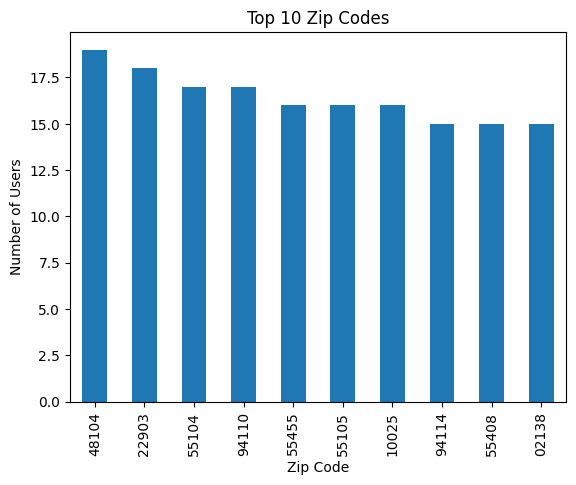

In [12]:
zip_code_counts = user_df['ZipCode'].value_counts().head(10)
zip_code_counts.plot(kind='bar')
plt.title('Top 10 Zip Codes')
plt.xlabel('Zip Code')
plt.ylabel('Number of Users')
plt.show()

## Data Preprocessing

#### Checking missing values

In [13]:
missing_values = user_df.isnull().sum()
print(missing_values)

UserID        0
Gender        0
Age           0
Occupation    0
ZipCode       0
dtype: int64


### Encoding the categorical variable(Gender)

In [14]:
user_df['Gender'] = user_df['Gender'].map({'F': 0, 'M': 1})

In [15]:
user_df.head(10)

,UserID,Gender,Age,Occupation,ZipCode
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455
5,6,0,50,9,55117
6,7,1,35,1,06810
7,8,1,25,12,11413
8,9,1,25,17,61614
9,10,0,35,1,95370


### Feature Engineering

In [16]:
#unique age values
unique_ages = user_df['Age'].unique()
unique_ages.sort()  
print(unique_ages)

[ 1 18 25 35 45 50 56]


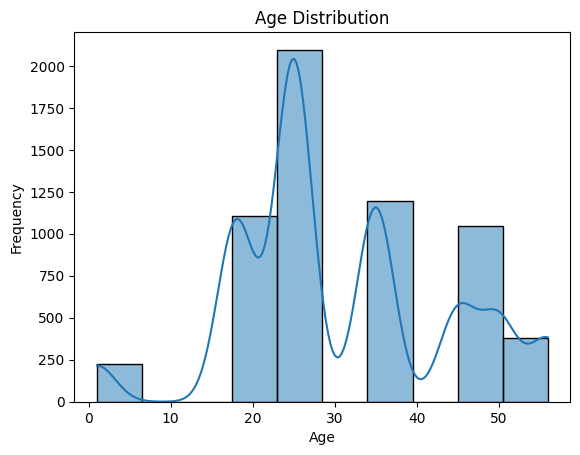

In [17]:
#frequency distribution of age
sns.histplot(user_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [18]:
bins = [0, 18, 25, 35, 45, 50, 57]
labels = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50+']
user_df['AgeGroup'] = pd.cut(user_df['Age'], bins=bins, labels=labels, right=False)

In [19]:
user_df.head(10)

,UserID,Gender,Age,Occupation,ZipCode,AgeGroup
0,1,0,1,10,48067,Under 18
1,2,1,56,16,70072,50+
2,3,1,25,15,55117,25-34
3,4,1,45,7,02460,45-49
4,5,1,25,20,55455,25-34
5,6,0,50,9,55117,50+
6,7,1,35,1,06810,35-44
7,8,1,25,12,11413,25-34
8,9,1,25,17,61614,25-34
9,10,0,35,1,95370,35-44


### Checking for any duplicates

In [20]:
duplicates = user_df.duplicated()
print(duplicates.any())  
#no duplicates

False


### User id must be unique, checking for it

In [21]:
if user_df['UserID'].duplicated().any():
    print("There are duplicate UserIDs in the dataset.")
else:
    print("No duplicate UserIDs found.")

No duplicate UserIDs found.


#### Finding the invalid zipcodes

In [22]:
invalid_zip_codes_length_6 = user_df[user_df['ZipCode'].str.len() == 6]
print(invalid_zip_codes_length_6)
print(invalid_zip_codes_length_6.count())

      UserID  Gender  Age  Occupation ZipCode  AgeGroup
1090    1091       1   18           5  345567     18-24
1433    1434       0    1          10  495321  Under 18
2105    2106       0   18          20  495321     18-24
2852    2853       1    1           1  444555  Under 18
3354    3355       1   25           1  400060     25-34
3904    3905       1   25          17  361069     25-34
4453    4454       1   25          20  111225     25-34
4912    4913       0   25           1  970025     25-34
4972    4973       0   56           2  949702       50+
5509    5510       1   18           4  191004     18-24
5903    5904       0   45          12  954025     45-49
UserID        11
Gender        11
Age           11
Occupation    11
ZipCode       11
AgeGroup      11
dtype: int64


### Removing the invalid zip codes 


In [23]:
user_df_cleaned = user_df[user_df['ZipCode'].str.len() != 6]

In [24]:
print(user_df_cleaned.count())

UserID        6029
Gender        6029
Age           6029
Occupation    6029
ZipCode       6029
AgeGroup      6029
dtype: int64


In [25]:
user_df.count()

UserID        6040
Gender        6040
Age           6040
Occupation    6040
ZipCode       6040
AgeGroup      6040
dtype: int64

### Normalizing all zipcodes to length 5 

In [26]:
user_df_cleaned['ZipCode'] = user_df['ZipCode'].str[:5]

/var/folders/93/vg7zf65913d920q1n72wl9580000gn/T/ipykernel_12727/3587931773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df_cleaned['ZipCode'] = user_df['ZipCode'].str[:5]


In [27]:
user_df_cleaned.head()

,UserID,Gender,Age,Occupation,ZipCode,AgeGroup
0,1,0,1,10,48067,Under 18
1,2,1,56,16,70072,50+
2,3,1,25,15,55117,25-34
3,4,1,45,7,02460,45-49
4,5,1,25,20,55455,25-34


### Checking for validity 


In [28]:
invalid_zip_codes = user_df_cleaned[~user_df['ZipCode'].str.match(r'^\d{5}$')]
print(invalid_zip_codes)

      UserID  Gender  Age  Occupation ZipCode AgeGroup
160      161       1   45          16   98107    45-49
232      233       0   45          20   37919    45-49
292      293       1   56           1   55337      50+
457      458       1   50          16   55405      50+
505      506       1   25          16   55103    25-34
...      ...     ...  ...         ...     ...      ...
5664    5665       1   18           4   10461    18-24
5681    5682       1   18           0   23455    18-24
5924    5925       0   25           0   90035    25-34
5966    5967       1   50          16   73069      50+
5984    5985       0   18           4   78705    18-24

[70 rows x 6 columns]


/var/folders/93/vg7zf65913d920q1n72wl9580000gn/T/ipykernel_12727/3752320213.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_zip_codes = user_df_cleaned[~user_df['ZipCode'].str.match(r'^\d{5}$')]


### Correlation matrix

              UserID    Gender       Age  Occupation
UserID      1.000000 -0.035048  0.005713   -0.018120
Gender     -0.035048  1.000000 -0.010733    0.153553
Age         0.005713 -0.010733  1.000000    0.065210
Occupation -0.018120  0.153553  0.065210    1.000000


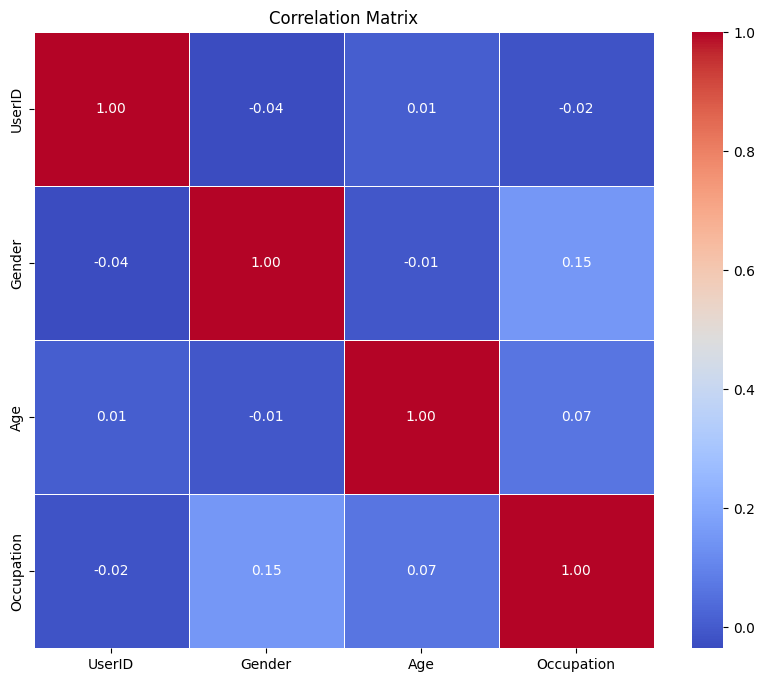

In [29]:
numeric_df = user_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
